An analysis of inspection Score distribution by Community Board

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

Import previously saved Dataframe containing complete inspection and restaurant data

In [10]:
df_merged=pd.read_csv('merged.csv')
df_merged.head()

Unnamed: 0     CAMIS        DATE  SCORE  \
0           0  30075445  2017-05-18    7.0   
1           1  30075445  2018-05-11    5.0   
2           2  30075445  2019-05-16   14.0   
3           3  30112340  2016-10-03   48.0   
4           4  30112340  2017-06-26    7.0   

                         INSPECTION TYPE  02A  02B  02C  02D  02E  ...  10I  \
0  Cycle Inspection / Initial Inspection  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1  Cycle Inspection / Initial Inspection  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2  Cycle Inspection / Initial Inspection  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3  Cycle Inspection / Initial Inspection  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4  Cycle Inspection / Initial Inspection  0.0  0.0  0.0  0.0  0.0  ...  0.0   

   10J                                           ACTION  CRITICAL FLAG  GRADE  \
0  0.0  Violations were cited in the following area(s).              1      A   
1  0.0  Violations were cited in the following area(s).              0      A   
2  0.0  Violations were cited in the following area(s).              1      B   
3  0.0  Violations were cited in the following area(s).              3      C   
4  0.0  Violations were cited in the following area(s).              1      A   

                     DBA  CUISINE DESCRIPTION  is_chain  Community Board  \
0  MORRIS PARK BAKE SHOP               Bakery         0            211.0   
1  MORRIS PARK BAKE SHOP               Bakery         0            211.0   
2  MORRIS PARK BAKE SHOP               Bakery         0            211.0   
3                WENDY'S           Hamburgers         1            309.0   
4                WENDY'S           Hamburgers         1            309.0   

       BORO  
0     Bronx  
1     Bronx  
2     Bronx  
3  Brooklyn  
4  Brooklyn  

[5 rows x 78 columns]

In [11]:
df_merged.drop(columns='Unnamed: 0',inplace=True)
df_merged['DATE']=pd.to_datetime(df_merged['DATE'])
df_merged.head()

CAMIS       DATE  SCORE                        INSPECTION TYPE  02A  \
0  30075445 2017-05-18    7.0  Cycle Inspection / Initial Inspection  0.0   
1  30075445 2018-05-11    5.0  Cycle Inspection / Initial Inspection  0.0   
2  30075445 2019-05-16   14.0  Cycle Inspection / Initial Inspection  0.0   
3  30112340 2016-10-03   48.0  Cycle Inspection / Initial Inspection  0.0   
4  30112340 2017-06-26    7.0  Cycle Inspection / Initial Inspection  0.0   

   02B  02C  02D  02E  02F  ...  10I  10J  \
0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                            ACTION  CRITICAL FLAG  GRADE  \
0  Violations were cited in the following area(s).              1      A   
1  Violations were cited in the following area(s).              0      A   
2  Violations were cited in the following area(s).              1      B   
3  Violations were cited in the following area(s).              3      C   
4  Violations were cited in the following area(s).              1      A   

                     DBA  CUISINE DESCRIPTION  is_chain  Community Board  \
0  MORRIS PARK BAKE SHOP               Bakery         0            211.0   
1  MORRIS PARK BAKE SHOP               Bakery         0            211.0   
2  MORRIS PARK BAKE SHOP               Bakery         0            211.0   
3                WENDY'S           Hamburgers         1            309.0   
4                WENDY'S           Hamburgers         1            309.0   

       BORO  
0     Bronx  
1     Bronx  
2     Bronx  
3  Brooklyn  
4  Brooklyn  

[5 rows x 77 columns]

Grouping by community board to determine average score for each area.

In [12]:
df_merged.groupby('Community Board')['SCORE'].mean().sort_values().head()

Community Board
482.0    5.666667
226.0    6.666667
480.0    7.392857
164.0    8.272727
483.0    9.686047
Name: SCORE, dtype: float64

Summary of Community Board average scores

In [13]:
df_merged.groupby('Community Board')['SCORE'].mean().describe()

count    69.000000
mean     15.024587
std       2.391648
min       5.666667
25%      14.684808
50%      15.566265
75%      16.394218
max      17.875752
Name: SCORE, dtype: float64

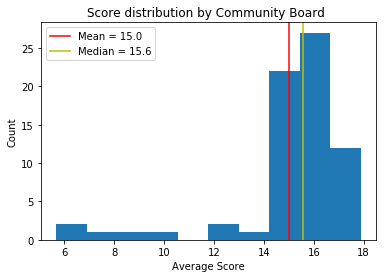

In [14]:
com_avg=df_merged.groupby('Community Board')['SCORE'].mean()
plt.hist(com_avg)
plt.axvline(x=np.mean(com_avg),color='r',label=f'Mean = {round(np.mean(com_avg),1)}')
plt.axvline(x=np.median(com_avg),color='y',label=f'Median = {round(np.median(com_avg),1)}')
plt.legend()
plt.title('Score distribution by Community Board ')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()

In [15]:
df_com_avg=pd.Series.to_frame(com_avg).reset_index()
df_com_avg['Community Board']=df_com_avg['Community Board'].astype(int).astype(str)
df_com_avg.head()

Community Board      SCORE
0             101  14.684808
1             102  16.493172
2             103  17.736706
3             104  15.768121
4             105  14.678484

Create a folium map of community boards across new york shaded by their average initial inspection score

In [16]:
m_ave = folium.Map(location=[40.63, -73.855972], zoom_start=10)

folium.Choropleth(
    geo_data='Community Districts.geojson',
    name='choropleth',
    data=df_com_avg,
    columns=['Community Board', 'SCORE'],
    key_on='feature.properties.boro_cd',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Average Restaurant Initial inspection score'
).add_to(m_ave)

m_ave

Incorporate number of inspections that occured within that Community Board in Dataframe

In [17]:
df_com_avg['count']=df_merged['Community Board'].value_counts().sort_index().values
df_com_avg.head()

Community Board      SCORE  count
0             101  14.684808   2113
1             102  16.493172   3149
2             103  17.736706   3103
3             104  15.768121   2704
4             105  14.678484   6093

Graph the logarithm of the count of inspections vs the average score for each community board. 


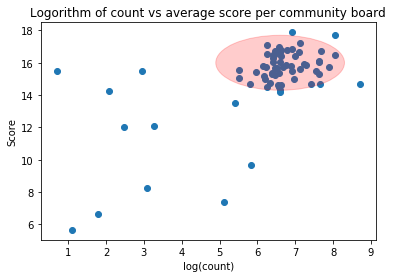

In [18]:
# plt.scatter(df_com_avg['count'],df_com_avg['SCORE'])
fig=plt.figure()
plt.scatter(np.log(df_com_avg['count']),df_com_avg['SCORE'])
circle=plt.Circle((6.6,16),1.7,color='red',alpha=0.2,label='Cluster')
ax=fig.gca()
ax.add_artist(circle)
plt.title('Logorithm of count vs average score per community board')
plt.xlabel('log(count)')
plt.ylabel('Score')
plt.show()

A cluster is identified where most of the community boards with an log(inspection count) of 5-8 have an average score of 14-17.


Count in above case refers to number of inspections performed not number of restaurants that exist i na particulary Community Board area. These are expected to be heavily dependedent features. (More restaurants means more inspections)

In [19]:
df_rests=pd.read_csv('rests.csv')
df_rests.rename(columns={'Unnamed: 0':'CAMIS'},inplace=True)
df_rests.head()

CAMIS                             DBA CUISINE DESCRIPTION       BORO  \
0  30075445           MORRIS PARK BAKE SHOP              Bakery      Bronx   
1  30112340                         WENDY'S          Hamburgers   Brooklyn   
2  30191841  DJ REYNOLDS PUB AND RESTAURANT               Irish  Manhattan   
3  40356018                RIVIERA CATERERS            American   Brooklyn   
4  40356151         BRUNOS ON THE BOULEVARD            American     Queens   

  BUILDING             STREET  ZIPCODE   Latitude  Longitude  Community Board  \
0     1007    MORRIS PARK AVE  10462.0  40.848231 -73.855972            211.0   
1      469    FLATBUSH AVENUE  11225.0  40.662652 -73.962081            309.0   
2      351   WEST   57 STREET  10019.0  40.767326 -73.984310            104.0   
3     2780   STILLWELL AVENUE  11224.0  40.579920 -73.982090            313.0   
4     8825  ASTORIA BOULEVARD  11369.0  40.763971 -73.880973            403.0   

   Council District  Census Tract        BIN           BBL   NTA  is_chain  
0              13.0       25200.0  2045445.0  2.041270e+09  BX37         0  
1              40.0       32700.0  3029737.0  3.011970e+09  BK60         1  
2               3.0       13900.0  1026048.0  1.010480e+09  MN15         0  
3              47.0       34800.0  3347399.0  3.069970e+09  BK21         0  
4              22.0       32900.0  4024132.0  4.011000e+09  QN28         0

In [20]:
df_rests['Community Board'].value_counts().sort_index().head()

101.0     712
102.0    1085
103.0    1077
104.0     936
105.0    2080
Name: Community Board, dtype: int64

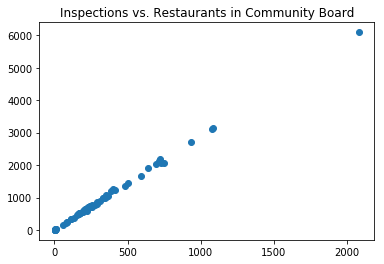

In [23]:
df_com_avg['count_rests']=df_rests['Community Board'].value_counts().sort_index().values
plt.scatter(df_com_avg['count_rests'],df_com_avg['count'])
plt.title('Inspections vs. Restaurants in Community Board')
plt.show()

In [18]:
df_com_avg[['count','count_rests']].corr()

count  count_rests
count        1.000000     0.999409
count_rests  0.999409     1.000000

As expected the number inspections and the number of restaurants are almost 100% correlated. Unnecessary to indicate both as a feature

In [21]:
cb_stats=pd.DataFrame()
cb_stats['Community Board']=sorted(df_merged['Community Board'].dropna().unique())
cb_stats['cb score mean']= df_merged.groupby('Community Board')['SCORE'].mean().sort_index().values
cb_stats['cb score std']= df_merged.groupby('Community Board')['SCORE'].std().sort_index().values
cb_stats['cb count']=df_merged['Community Board'].value_counts().sort_index().values
cb_stats.head()

Community Board  cb score mean  cb score std  cb count
0            101.0      14.684808     10.633265      2113
1            102.0      16.493172     11.560859      3149
2            103.0      17.736706     13.020565      3103
3            104.0      15.768121     10.975397      2704
4            105.0      14.678484     11.384473      6093

In [20]:
cb_stats.to_csv('cb_stats.csv')